# WEIGHT ESTIMATION - Research Project

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import libraries
import torch
import torchvision
import torchvision.transforms as T
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
from torchvision import datasets
from skimage import io, transform
from torch.utils.data import DataLoader
import time
import os
#from tensorboardcolab import TensorBoardColab
from PIL import Image
from torchvision import transforms
import logging
from datetime import datetime


In [0]:
import torchvision.models as models
densenet = models.densenet161(pretrained=False)

In [4]:

densenet.classifier = nn.Linear(2208, 1)
print(densenet)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [5]:
# Get the seconds since epoch
secondsSinceEpoch = time.time()
# Convert seconds since epoch to struct_time
timeObj = time.localtime(secondsSinceEpoch)

time = str(timeObj.tm_mday)+ '-' + str(timeObj.tm_mon) +'-'+ str(timeObj.tm_year)+'-'+str(timeObj.tm_hour)+'_'+str(timeObj.tm_min)
print(time)

6-4-2020-19_8


In [6]:
# Path of Folders
content = '/content/drive/My Drive/new-frames/'
labels_csv = '/content/drive/My Drive/weights.csv'
train_path = content + "train"
test_path = content + "test"
validation_path = content + "validation"

weights=pd.read_csv(labels_csv)
weights = weights['WEIGHT'].values

print('Start initialization logging file')
logging.basicConfig(filename='app_' + time + '.log', filemode='w', format='%(name)s - %(levelname)s - %(message)s')
logging.warning('Initialized File')


Start initialization logging file


## Discard


In [0]:
'''import numpy as np
import pandas as pd
import os


weights=pd.read_csv(labels_csv)
#weights = weights['WEIGHT'].values

train, validate, test = np.split(weights.sample(frac=1), [int(.6*len(weights)), int(.8*len(weights))])

def generateDatasetIDS(list, root_folder = "/content/drive/My Drive/frames/"):
  test_list = []
  for id in list.ID:
    #print("Id:", id)
    for root, dirs, files in os.walk(root_folder + str(id) ):
        for filename in files:
            #print("\t", str(id) + "/" + filename)
            if('.png' in filename):
              add_file = str(id) + "/" + filename
              test_list.append(add_file)
  return test_list
'''

'import numpy as np\nimport pandas as pd\nimport os\n\n\nweights=pd.read_csv(labels_csv)\n#weights = weights[\'WEIGHT\'].values\n\ntrain, validate, test = np.split(weights.sample(frac=1), [int(.6*len(weights)), int(.8*len(weights))])\n\ndef generateDatasetIDS(list, root_folder = "/content/drive/My Drive/frames/"):\n  test_list = []\n  for id in list.ID:\n    #print("Id:", id)\n    for root, dirs, files in os.walk(root_folder + str(id) ):\n        for filename in files:\n            #print("\t", str(id) + "/" + filename)\n            if(\'.png\' in filename):\n              add_file = str(id) + "/" + filename\n              test_list.append(add_file)\n  return test_list\n'

In [0]:
'''img_name = '17/17_67_16bit.png'
frame_name = img_name.split("/")
frame_name[0]
test_list = generateDatasetIDS(test,"/content/drive/My Drive/frames/")'''

'img_name = \'17/17_67_16bit.png\'\nframe_name = img_name.split("/")\nframe_name[0]\ntest_list = generateDatasetIDS(test,"/content/drive/My Drive/frames/")'

In [0]:
'''class CustomListDataset(torch.utils.data.Dataset):

    def __init__(self, images_list, df_weights, root_dir,transform = None):
        """
        Args:
            images_list(list): list with IDs into the dataset
            root_dir(string): directory with all the images
            df_weights(pd_dataframe): dataframe with all the weights of the people
            transform: trasform operation for images
        """
        self.images_list = images_list
        self.root_dir = root_dir
        self.df_weights = df_weights
        self.df_weights = self.df_weights['WEIGHT'].values
        self.transform = transform

    def __len__(self):
        return len(self.images_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images_list[idx])
        image = Image.open(img_name) # Attento a cosa la legge!!!!!!!!
        image = image.convert(mode='RGB')
        
        if(self.transform is not None):
            image = self.transform(image)

        frame_name = self.images_list[idx].split("/")
        id = int(frame_name[0])
        
        labels = self.df_weights[id]
        labels = np.float(labels)
        print(labels)
        sample = {'image': image, 'labels': labels}

        return sample



transform = transforms.Compose([
    # you can add other transformations in this list
    #transforms.Resize((299,299), interpolation=2),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(20),
    transforms.ToTensor()
])

testDataset = CustomListDataset(images_list = test_list, df_weights = weights,root_dir="/content/drive/My Drive/frames/", transform = transform)
mnistmTrainLoader = torch.utils.data.DataLoader(testDataset,batch_size=16,shuffle=True, num_workers=2)'''

'class CustomListDataset(torch.utils.data.Dataset):\n\n    def __init__(self, images_list, df_weights, root_dir,transform = None):\n        """\n        Args:\n            images_list(list): list with IDs into the dataset\n            root_dir(string): directory with all the images\n            df_weights(pd_dataframe): dataframe with all the weights of the people\n            transform: trasform operation for images\n        """\n        self.images_list = images_list\n        self.root_dir = root_dir\n        self.df_weights = df_weights\n        self.df_weights = self.df_weights[\'WEIGHT\'].values\n        self.transform = transform\n\n    def __len__(self):\n        return len(self.images_list)\n\n    def __getitem__(self, idx):\n        img_name = os.path.join(self.root_dir, self.images_list[idx])\n        image = Image.open(img_name) # Attento a cosa la legge!!!!!!!!\n        image = image.convert(mode=\'RGB\')\n        \n        if(self.transform is not None):\n            image

In [0]:
'''for (input , labels) in enumerate(mnistmTrainLoader):
  print ('Ciao')'''

"for (input , labels) in enumerate(mnistmTrainLoader):\n  print ('Ciao')"

SubFolders per dataset

In [0]:
'''# Length of each set
print("Train: ", len(os.listdir(train_path)))
print("Test: ", len(os.listdir(test_path)))
print("Validation: ", len(os.listdir(validation_path)))'''

'# Length of each set\nprint("Train: ", len(os.listdir(train_path)))\nprint("Test: ", len(os.listdir(test_path)))\nprint("Validation: ", len(os.listdir(validation_path)))'

In [0]:
''''class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """
    # override the __getitem__ method. this is the method dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns 
        #original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        
        # the image file path
        img_name = self.imgs[index][0]
        frame_name = img_name.split("/")

        #.convert('RGB')
        #image = io.imread(img_name)
        image = Image.open(img_name)
        #image = np.repeat(image[:,:,:,np.newaxis], 3, axis=3)
        #stacked_img = np.stack((image,)*3, axis=-1)
        image = image.convert(mode='RGB')

        #image = image.repeat(3, 1, 1)
        #img = img.view(125, 125, 1).expand(-1, -1, 3)

        if self.transform is not None:
            image = self.transform(image)
        
        person_id = int(frame_name[6])

        label = weights[person_id]
        label = np.float(label)
        #print(label)
        #sample = {'sample': image, 'labels': torch.as_tensor(label)}
        return image, torch.as_tensor(label)
''''

SyntaxError: ignored

## Datasets Preparation

In [0]:
'''NUM_WORKERS = 4
BATCH_SIZE = 32


# instead of doing a data augmentation, Pytorch module apply transformations
# at each epoch douring training
transform = transforms.Compose([
    # you can add other transformations in this list
    #transforms.Resize((299,299), interpolation=2),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(20),
    transforms.ToTensor()
])


train_dataset = ImageFolderWithPaths(train_path,transform=transform)

test_dataset = ImageFolderWithPaths(test_path,transform=transform)

validation_dataset = ImageFolderWithPaths(validation_path,transform=transform)
'''

In [0]:
'''test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=NUM_WORKERS)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=NUM_WORKERS)

validation_loader = DataLoader(dataset=validation_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=NUM_WORKERS)'''

In [0]:
'''print(len(train_dataset))
print(len(test_dataset))
print(len(validation_dataset))'''

In [0]:
'''for i_batch,sample_batched in enumerate(validation_loader,0):
    #print("training sample for mnist-m")
    print(str(i_batch) + str(sample_batched['labels'])) '''

## DenseNet

In [0]:
'''import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.2):
        super(BasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, training=self.training)
        return torch.cat([x, out], 1)

class BottleneckBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(BottleneckBlock, self).__init__()
        inter_planes = out_planes * 4
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, inter_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(inter_planes)
        self.conv2 = nn.Conv2d(inter_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        out = self.conv2(self.relu(self.bn2(out)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return torch.cat([x, out], 1)

class TransitionBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(TransitionBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return F.avg_pool2d(out, 2)

class DenseBlock(nn.Module):
    def __init__(self, nb_layers, in_planes, growth_rate, block, dropRate=0.0):
        super(DenseBlock, self).__init__()
        self.layer = self._make_layer(block, in_planes, growth_rate, nb_layers, dropRate)
    def _make_layer(self, block, in_planes, growth_rate, nb_layers, dropRate):
        layers = []
        for i in range(nb_layers):
            layers.append(block(in_planes+i*growth_rate, growth_rate, dropRate))
        return nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)

class DenseNet3(nn.Module):
    def __init__(self, depth, num_classes, growth_rate=12,
                 reduction=0.5, bottleneck=True, dropRate=0.0):
        super(DenseNet3, self).__init__()
        in_planes = 2 * growth_rate
        n = (depth - 4) / 3
        if bottleneck == True:
            n = n/2
            block = BottleneckBlock
        else:
            block = BasicBlock
        n = int(n)
        # 1st conv before any dense block
        self.conv1 = nn.Conv2d(3, in_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        # 1st block
        self.block1 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        self.trans1 = TransitionBlock(in_planes, int(math.floor(in_planes*reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes*reduction))
        # 2nd block
        self.block2 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        self.trans2 = TransitionBlock(in_planes, int(math.floor(in_planes*reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes*reduction))
        # 3rd block
        self.block3 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        # global average pooling and classifier
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.fc = nn.Linear(in_planes, num_classes)
        self.in_planes = in_planes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.bias.data.zero_()
    def forward(self, x):
        out = self.conv1(x)
        out = self.trans1(self.block1(out))
        out = self.trans2(self.block2(out))
        out = self.block3(out)
        out = self.relu(self.bn1(out))
        out = F.avg_pool2d(out, 8)
        out = out.view(-1, self.in_planes)
        return self.fc(out)

 '''

In [0]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.2):
        super(BasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, training=self.training)
        return torch.cat([x, out], 1)

class BottleneckBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(BottleneckBlock, self).__init__()
        inter_planes = out_planes * 4
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, inter_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(inter_planes)
        self.conv2 = nn.Conv2d(inter_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        out = self.conv2(self.relu(self.bn2(out)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return torch.cat([x, out], 1)

class TransitionBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(TransitionBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.droprate = dropRate
    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return F.avg_pool2d(out, 2)

class DenseBlock(nn.Module):
    def __init__(self, nb_layers, in_planes, growth_rate, block, dropRate=0.0):
        super(DenseBlock, self).__init__()
        self.layer = self._make_layer(block, in_planes, growth_rate, nb_layers, dropRate)
    def _make_layer(self, block, in_planes, growth_rate, nb_layers, dropRate):
        layers = []
        for i in range(nb_layers):
            layers.append(block(in_planes+i*growth_rate, growth_rate, dropRate))
        return nn.Sequential(*layers)
    def forward(self, x):
        return self.layer(x)

class DenseNetFixed(nn.Module):
    def __init__(self, depth, num_classes = 1, growth_rate=12,
                 reduction=0.5, bottleneck=True, dropRate=0.1):
        super(DenseNetFixed, self).__init__()
        in_planes = 2 * growth_rate
        n = (depth - 4) / 3
        if bottleneck == True:
            n = n/2
            block = BottleneckBlock
        else:
            block = BasicBlock
        n = int(n)
        # 1st conv before any dense block
        self.conv1 = nn.Conv2d(3, in_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        # 1st block
        self.block1 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        self.trans1 = TransitionBlock(in_planes, int(math.floor(in_planes*reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes*reduction))
        # 2nd block
        self.block2 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        self.trans2 = TransitionBlock(in_planes, int(math.floor(in_planes*reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes*reduction))
        # 3rd block
        self.block3 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes+n*growth_rate)
        # global average pooling and classifier
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.fc = nn.Linear(96, num_classes)
        self.fc2 = nn.Linear(1, 1)
        self.in_planes = in_planes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.bias.data.zero_()
    def forward(self, x):
        out = self.conv1(x)
        out = self.trans1(self.block1(out))
        out = self.trans2(self.block2(out))
        out = self.block3(out)
        out = self.relu(self.bn1(out))
        #print('Before pool.', out.shape)
        out = F.avg_pool2d(out, 8)
        #print('After pool.', out.shape)

        #out = out.view(-1, self.in_planes)
        out = out.view(out.size(0), -1) 

        #print('Linear.', out.shape)

        out = self.fc(out)
        #print('Linear1.', out.shape)
        
        out = out.view(out.size(0), -1) 
        out = self.fc2(out)
        #print('Linear2.', out.shape)
        return out

 

## Training and Testing Functions (for mini batches) 

```
# TODO check the MSE Average loss to be sure
```



Log Something to keeep track of the:


*   Batch Size
*   Epoch
*   Loss




In [0]:
def train(net,data_loader,optimizer,cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  #cumulative_accuracy = 0.
  
  # Set the network in train mode
  net.train()
  logging.info('Start Training')
  
  # Loop over the dataset
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    
    targets = targets.to(device)
    #print("\t\t targets:" , len(targets))
    
    # Forward pass
    outputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)

    lambda_ = torch.tensor(1.).to(device)
    l2_reg = torch.tensor(0.).to(device)
    for param in net.parameters():
      l2_reg += torch.norm(param)
    loss += lambda_ * l2_reg
    #loss.backward() 

    
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Reset the optimizer
    optimizer.zero_grad()
    logging.warning('\t\t\tBatch Train {:.5f} Loss: {:.5f} -- IN-Shape{:.5f}'.format(batch_idx, loss.item() / inputs.shape[0], inputs.shape[0]))
    #print('\t\t\tBatch Train {:.5f} Loss: {:.5f} -- IN-Shape{:.5f}'.format(batch_idx, loss.item() / inputs.shape[0], inputs.shape[0]))

    samples+=inputs.shape[0]
    cumulative_loss += loss.item()
  #print('Samples',samples)
  return cumulative_loss/samples


def test(net, data_loader, cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  #cumulative_accuracy = 0.

  logging.info('Start Testing/Validation')


  #Set the network in eval mode
  net.eval()
  with torch.no_grad(): # torch.no_grad() disables the autograd machinery, thus not saving the intermediate activations
    # Loop over the dataset
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      # Load data into GPU
      inputs = inputs.to(device)

      targets = targets.to(device)

      # Forward pass
      outputs = net(inputs)

      # Apply the loss
      loss = cost_function(outputs, targets)

      # Better print something
      samples+=inputs.shape[0]
      cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
      
      logging.warning('\t\t\tBatch Train {:.5f} Loss: {:.5f} -- IN-Shape{:.5f}'.format(batch_idx, loss.item() / inputs.shape[0], inputs.shape[0]))

      #_, predicted = outputs
      #print("Predicted:", outputs.size())
      #cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples


## Optimizer and Cost Function
Declaration of the optimizer and of the cost function.

In [0]:
def get_optimizer(net, lr):
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  return optimizer

def get_cost_function():
  cost_function = torch.nn.MSELoss()
  return cost_function

## Running

It is also possible to plot something with the tensorBoard:
* training Loss
* Validation / Test Loss

In [0]:
# Instantiate visualizer
tb = TensorBoardColab(graph_path='./log')
visualization_name='Weight Estimation'

device='cuda:0'
momentum = 0.9
learning_rate = 0.001 
num_epochs = 200
weight_decay = 1e-5

#Network initialization - 3 Best
net = DenseNet3(3,1)
net.to(device)

optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)
cost_function = get_cost_function()

train_loss_list = list()
test_loss_list = list()

logging.info('Initialized Parameters')

print('Before training:')
logging.info('Before training:')

train_loss = test(net, train_loader, cost_function)
test_loss = test(net, test_loader, cost_function)

train_loss_list.append(train_loss)
test_loss_list.append(test_loss)


print('\t Training loss {:.5f}'.format(train_loss))
print('\t Test loss {:.5f}'.format(test_loss))
logging.warning('\t Training loss {:.5f}'.format(train_loss))
logging.warning('\t Test loss {:.5f}'.format(test_loss))
print('-----------------------------------------------------')


# Add values to plots
tb.save_value('Loss/train_loss', visualization_name, 0, train_loss)
tb.save_value('Loss/test_loss', visualization_name, 0, test_loss)

# Update plots 
tb.flush_line(visualization_name)

for e in range(num_epochs):
  train_loss = train(net, train_loader, optimizer, cost_function)
  val_loss = test(net, validation_loader, cost_function)
  print('Epoch: {:d}'.format(e+1))
  print('\t Training loss {:.5f}'.format(train_loss))
  print('\t Test loss {:.5f}'.format(val_loss))
  logging.warning('\t Training loss {:.5f}'.format(train_loss))
  logging.warning('\t Validation loss {:.5f}'.format(val_loss))
  print('-----------------------------------------------------')
  
  train_loss_list.append(train_loss)
  test_loss_list.append(val_loss)
  
  # Add values to plots
  tb.save_value('Loss/train_loss', visualization_name, e + 1, train_loss)
  tb.save_value('Loss/test_loss', visualization_name, e + 1, val_loss)
  # Update plots 
  tb.flush_line(visualization_name)
  
print('After training:')
train_loss = test(net, train_loader, cost_function)
test_loss = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}'.format(train_loss))
print('\t Test loss {:.5f},'.format(test_loss))
print('-----------------------------------------------------')


## K-fold Cross-Validation

This part is a simple implementation of the K-Fold Cross Vlidation with a fixed dataset.

*In the logs of the notebook it is possible to see that with this configuration the Net cannot generalize in a good way with some kind of examples.*

In [0]:
import copy
import time
from sklearn.model_selection import KFold
from tqdm import tqdm
import random

def seed_torch(seed=1029):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(123)
device='cuda:0'
momentum = 0.9
learning_rate = 0.001
num_epochs = 30
weight_decay = 1e-5
splits = 5
batch_size = 16

#Network initialization - 3 Best
model = DenseNet3(5,1)

optimizer = get_optimizer(model, learning_rate, weight_decay, momentum)
loss_fn = get_cost_function()

kf = KFold(n_splits=splits, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(train_dataset)):
  #model.load_state_dict(init_state)
  #optimizer.load_state_dict(init_state_opt)
  model.cuda()
  #loss_fn = cost_function
  
  train = torch.utils.data.Subset(train_dataset, train_index)
  test = torch.utils.data.Subset(train_dataset, test_index)

  trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2)
  validationloader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True, num_workers=2)

  print(f'Len Train: {len(trainloader)}')
  print(f'Len validation: {len(validationloader)}')

  print(f'Fold {i + 1}')
    
  for epoch in range(num_epochs):
      start_time = time.time()
      
      model.train()
      avg_loss = 0.
      cumulative_loss = 0.
      samples = 0
      for x_batch, y_batch in tqdm(trainloader, disable=True):
          x_batch = x_batch.to(device)
          y_batch = y_batch.to(device)
          y_pred = model(x_batch)
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          samples+=x_batch.shape[0]
          cumulative_loss += loss.item()
      avg_loss = cumulative_loss / samples
      
      model.eval()
      avg_val_loss = 0.
      cumulative_val_loss = 0.
      val_samples = 0
      for i, (x_batch, y_batch) in enumerate(validationloader):
          x_batch = x_batch.to(device)
          y_batch = y_batch.to(device)
          y_pred = model(x_batch).detach()
          cumulative_val_loss += loss_fn(y_pred, y_batch).item()
          val_samples += x_batch.shape[0]
      avg_val_loss = cumulative_val_loss / val_samples
          #valid_preds_fold[i * batch_size:(i+1) * batch_size] = sigmoid(y_pred.cpu().numpy())[:, 0]

      elapsed_time = time.time() - start_time 
      print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f} \t time={:.2f}s'.format(
          epoch + 1, num_epochs, avg_loss, avg_val_loss, elapsed_time))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## New KFold Cross Validation
This is an improvement of the section before since this one creates dinamically the minibatch for the computatation of a single fold


In [0]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

weights=pd.read_csv(labels_csv)
train_IDs, test_IDs = train_test_split(weights, test_size=0.3, random_state=42)

In [9]:
# Check len of IDs
print('Train:', len(train_IDs))
print('Test:', len(test_IDs))

Train: 72
Test: 31


In [0]:
def generateDatasetIDS(list, root_folder = "/content/drive/My Drive/frames/"):
  """
  Return a list with all the image paths relative to those IDs
  """
  test_list = []
  for id in list:
    #print("Id:", id)
    for root, dirs, files in os.walk(root_folder + str(id) ):
        for filename in files:
            #print("\t", str(id) + "/" + filename)
            if('.png' in filename):
              add_file = str(id) + "/" + filename
              test_list.append(add_file)
  return test_list


class CustomListDataset(torch.utils.data.Dataset):

    def __init__(self, images_list, df_weights, root_dir,transform = None):
        """
        Args:
            images_list(list): list with IDs into the dataset
            root_dir(string): directory with all the images
            df_weights(pd_dataframe): dataframe with all the weights of the people
            transform: trasform operation for images
        """
        self.images_list = images_list
        self.root_dir = root_dir
        self.df_weights = df_weights
        self.df_weights = self.df_weights['WEIGHT'].values
        self.transform = transform

    def __len__(self):
        return len(self.images_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images_list[idx])
        image = Image.open(img_name)
        image = image.convert(mode='RGB')
        
        if(self.transform is not None):
            image = self.transform(image)

        frame_name = self.images_list[idx].split("/")
        id = int(frame_name[0]) 
        
        labels = self.df_weights[id]
        labels = np.float(labels)
        #print(labels)
        #sample = {'image': image, 'labels': labels}
        return image, torch.as_tensor(labels)

        #return sample


transform = transforms.Compose([
    # you can add other transformations in this list
    #transforms.Resize((299,299), interpolation=2),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(20),
    transforms.ToTensor()
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#testDataset = CustomListDataset(images_list = test_list, df_weights = weights,root_dir="/content/drive/My Drive/frames/", transform = transform)
#mnistmTrainLoader = torch.utils.data.DataLoader(testDataset,batch_size=16,shuffle=True, num_workers=2)

In [11]:
import copy
import time
from sklearn.model_selection import KFold
from tqdm import tqdm
import random

def seed_torch(seed=1029):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(11)
device='cuda:0'
learning_rate = 0.001
num_epochs = 30
splits = 3
batch_size = 128

#model = DenseNetFixed(5,1)
model = densenet

# vgg19.classifier._modules['6'] = nn.Linear(4096, 8)




optimizer = get_optimizer(model, learning_rate)
loss_fn = get_cost_function()

kf = KFold(n_splits=splits, shuffle=True)
fold = 1

for train_index, test_index in kf.split(train_IDs):
  #print("TRAIN:", len(train_index), "TEST:", len(test_index))
  model.cuda()
  train_images_list = generateDatasetIDS(train_index,"/content/drive/My Drive/frames/")
  train = CustomListDataset(images_list = train_images_list, df_weights = weights, root_dir="/content/drive/My Drive/frames/", transform = transform)
  trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)

  test_images_list = generateDatasetIDS(test_index,"/content/drive/My Drive/frames/")
  test = CustomListDataset(images_list = test_images_list, df_weights = weights, root_dir="/content/drive/My Drive/frames/", transform = transform)
  validationloader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True)

  print(f'Len Train (in batch): {len(trainloader)}')
  print(f'Len validation (in batch): {len(validationloader)}')

  print(f'Fold {fold}')
  fold += 1

  for epoch in range(num_epochs):
      start_time = time.time()
      
      model.train()
      avg_loss = 0.
      cumulative_loss = 0.
      samples = 0
      for i, (x_batch, y_batch) in enumerate(trainloader):
          x_batch = x_batch.to(device)
          y_batch = y_batch.to(device)
          y_batch = y_batch.view(-1,1)
          y_pred = model(x_batch)
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
      
          # Loss Regularization
          '''lambda_ = torch.tensor(1e-3).to(device)
          l2_reg = torch.tensor(0.).to(device)
          for param in model.parameters():
            l2_reg += torch.norm(param)
          loss += lambda_ * l2_reg
'''
          loss.backward()
          optimizer.step()
          samples+=x_batch.shape[0]
          cumulative_loss += loss.item()
      avg_loss = cumulative_loss / samples
      
      model.eval()
      avg_val_loss = 0.
      cumulative_val_loss = 0.
      val_samples = 0
      with torch.no_grad():
        for i, (x_batch, y_batch) in enumerate(validationloader):
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_batch = y_batch.view(-1,1)
            y_pred = model(x_batch)
            cumulative_val_loss += loss_fn(y_pred, y_batch).item()
            val_samples += x_batch.shape[0]
        avg_val_loss = cumulative_val_loss / val_samples
          #valid_preds_fold[i * batch_size:(i+1) * batch_size] = sigmoid(y_pred.cpu().numpy())[:, 0]

      elapsed_time = time.time() - start_time 
      print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f} \t time={:.2f}s'.format(
          epoch + 1, num_epochs, avg_loss, avg_val_loss, elapsed_time))
  


Len Train (in batch): 12
Len validation (in batch): 6
Fold 1
Epoch 1/30 	 loss=35.7545 	 val_loss=862.6910 	 time=1608.12s
Epoch 2/30 	 loss=24.2489 	 val_loss=21.6280 	 time=11.90s
Epoch 3/30 	 loss=14.8851 	 val_loss=14.3182 	 time=11.90s
Epoch 4/30 	 loss=7.3557 	 val_loss=9.2844 	 time=11.91s
Epoch 5/30 	 loss=2.8144 	 val_loss=4.4305 	 time=11.95s
Epoch 6/30 	 loss=0.9379 	 val_loss=2.0747 	 time=11.91s
Epoch 7/30 	 loss=0.4721 	 val_loss=1.8283 	 time=11.91s
Epoch 8/30 	 loss=0.5573 	 val_loss=2.4080 	 time=11.91s
Epoch 9/30 	 loss=0.4366 	 val_loss=3.2319 	 time=11.91s
Epoch 10/30 	 loss=0.3444 	 val_loss=1.5073 	 time=11.92s
Epoch 11/30 	 loss=0.2642 	 val_loss=1.6447 	 time=11.91s
Epoch 12/30 	 loss=0.1927 	 val_loss=1.3542 	 time=11.90s
Epoch 13/30 	 loss=0.1436 	 val_loss=1.4450 	 time=11.89s
Epoch 14/30 	 loss=0.1258 	 val_loss=1.5932 	 time=11.90s
Epoch 15/30 	 loss=0.1013 	 val_loss=1.4789 	 time=11.93s
Epoch 16/30 	 loss=0.0742 	 val_loss=1.7187 	 time=11.88s
Epoch 17/30

*Test* the final Results:


In [0]:
# Save the network parameters
torch.save(model.state_dict(), "/content/drive/My Drive/model/31marzo2020-3strati-batchsize256-3split-70-30test-notransform.pt") 


In [13]:
test_list = generateDatasetIDS(test_IDs.ID,"/content/drive/My Drive/frames/")
print(len(test_list))
test_custom = CustomListDataset(images_list = test_list, df_weights = weights, root_dir="/content/drive/My Drive/frames/", transform = transform)
test_final_loader = torch.utils.data.DataLoader(test_custom, batch_size=64, shuffle=False, num_workers=2)

print(len(test_final_loader))
print(len(test_final_loader.dataset))

predicted_label = list()
real_label = list()

#Set the network in eval mode
model.eval()
with torch.no_grad():
  # Loop over the dataset
  for batch_idx, (inputs, targets) in enumerate(test_final_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    print('inputs', inputs.shape)

    targets = targets.to(device)
    print('targets', targets.shape)

    # Forward pass
    outputs = model.forward(inputs)
    
    print('Out:',outputs.shape)
    

    arr1 = outputs.data.cpu().numpy()
    #predicted_label += arr1
    arr2 = targets.data.cpu().numpy()
    #print(arr1)
    #real_label += arr2


    predicted_label.extend(arr1)
    real_label.extend(arr2)


991
16
991
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 150])
targets torch.Size([64])
Out: torch.Size([64, 1])
inputs torch.Size([64, 3, 150, 1

In [14]:
#print (predicted_label)

import numpy as np
predicted_label = np.array(predicted_label,dtype=int)
real_label = np.array(real_label, dtype=int)
#print(predicted_label)

pred_label_list = list()
for x in np.nditer(predicted_label):
  #print(x)
  pred_label_list.append(x)

real_label_list = list()
for x in np.nditer(real_label):
  real_label_list.append(x)

print(len(pred_label_list))

991


<class 'numpy.ndarray'>


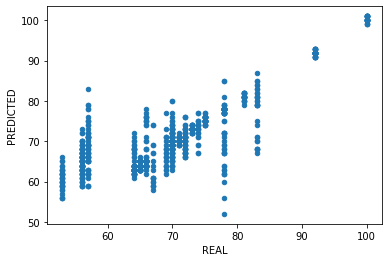

In [15]:
import numpy as np
import pandas as pd

'''real_label, predicted_label'''

print(type(real_label))

df = pd.DataFrame({'REAL': np.asarray(real_label_list), 'PREDICTED':np.asarray(pred_label_list)})
df.plot('REAL', 'PREDICTED', kind='scatter')

In [16]:
#See unique real values 
print(df.PREDICTED.unique())

#Check the average value of the predicted labels
df.groupby('REAL').mean()

[ 70  71  72  69  82  81  80  79  64  63  65  78  77  92  91  93  62  61
  60  59  67  58  74  68  66  57  56  75  76  52  83  73  85  84  87 100
 101  99]


,PREDICTED
REAL,
53,60.800000
56,65.040404
57,68.677966
64,64.352941
65,64.240000
66,66.808824
67,63.736842
69,67.304348
70,69.654676


In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

def r2_rmse( g ):
    r2 = r2_score( g.REAL, g.PREDICTED)
    count = len(g.REAL)
    mse = mean_squared_error( g['REAL'], g['PREDICTED'] ) 
    rmse = np.sqrt( mean_squared_error( g['REAL'], g['PREDICTED'] ) ) 
    return pd.Series( dict( count = int(count), r2 = r2, rmse = rmse, mse = mse ) )

print("Global:", r2_rmse(df))

#Statistics over REAL value
df.groupby( 'REAL' ).apply( r2_rmse ).reset_index()

Global: count    991.000000
r2         0.683583
rmse       5.701718
mse       32.509586
dtype: float64


,REAL,count,r2,rmse,mse
0,53,35.0,0.0,8.209750,67.400000
1,56,99.0,0.0,9.544685,91.101010
2,57,59.0,0.0,12.825425,164.491525
3,64,68.0,0.0,2.514663,6.323529
4,65,100.0,0.0,1.039230,1.080000
5,66,68.0,0.0,4.247837,18.044118
6,67,19.0,0.0,5.848977,34.210526
7,69,23.0,0.0,3.950784,15.608696
8,70,139.0,0.0,2.782267,7.741007
9,71,35.0,0.0,1.082326,1.171429
